

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

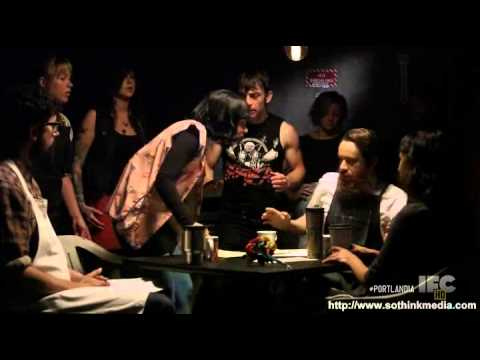

In [38]:
from IPython.display import YouTubeVideo
YouTubeVideo('Jml7NVYm8cs')

#0. Prepare

## 0.1 Get spacy

In [39]:
# Locally (or on colab) let's use en_core_web_lg 
!python -m spacy download en_core_web_md # Can do lg, takes awhile
# Also on Colab, need to restart runtime after this step!

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-01-18 20:24:42.101877: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 18.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


## 0.2 Restart runtime!

## 0.3 Install packages and do imports

In [40]:
!pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [41]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

-----

## 0.4 Get data

In [42]:
url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/main/module1-text-data/data/yelp_coffeeshop_review_data.csv"

df = pd.read_csv(url)
df.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [43]:
df['full_review_text'][0]

' 11/25/2016 1 check-in Love love loved the atmosphere! Every corner of the coffee shop had its own style, and there were swings!!! I ordered the matcha latte, and it was muy fantastico! Ordering and getting my drink were pretty streamlined. I ordered on an iPad, which included all beverage selections that ranged from coffee to wine, desired level of sweetness, and a checkout system. I got my latte within minutes!  I was hoping for a typical heart or feather on my latte, but found myself listing out all the possibilities of what the art may be. Any ideas? '

In [44]:
df.full_review_text.iloc[0:3]
#shows a truncated view of the first 3

0     11/25/2016 1 check-in Love love loved the atm...
1     12/2/2016 Listed in Date Night: Austin, Ambia...
2     11/30/2016 1 check-in Listed in Brunch Spots ...
Name: full_review_text, dtype: object

In [45]:
def print_out_N_reviews(N, df, col_name='full_review_text'):
  '''Prints out N number of text reviews for a specified column'''
  counter = 0
  for row_id, row in df[[col_name]].iterrows():
    text = row[0]
    print (text)
    print ('  ')
    if counter == N:
      break
    counter +=1

In [46]:
N = 2
print_out_N_reviews(N,df)

 11/25/2016 1 check-in Love love loved the atmosphere! Every corner of the coffee shop had its own style, and there were swings!!! I ordered the matcha latte, and it was muy fantastico! Ordering and getting my drink were pretty streamlined. I ordered on an iPad, which included all beverage selections that ranged from coffee to wine, desired level of sweetness, and a checkout system. I got my latte within minutes!  I was hoping for a typical heart or feather on my latte, but found myself listing out all the possibilities of what the art may be. Any ideas? 
  
 12/2/2016 Listed in Date Night: Austin, Ambiance in Austin BEAUTIFUL!!!! Love the ambiance! Instagram-worthy!!!  Definitely $$$, so be prepared. This is gonna cost you a pretty penny :) Waffle dessert was just decent...nothing to rave about.  But, will probably be back just to be somewhere unique and nice. 
  
 11/30/2016 1 check-in Listed in Brunch Spots I loved the eclectic and homey plush decor and who doesn't want to swing and

In [47]:
#we are looking to get high quality text data for our machine learning models to learn from
#we need to clean this text data
#we want to take out dates, unctuatuions and special characters from our dataset 
#we also want o preform case normalization and elimination of eccess white space
#everything other than words are not useful to our models
#we need clean TOKENS

In [48]:
N = 5
print_out_N_reviews(N, df, col_name='full_review_text')

 11/25/2016 1 check-in Love love loved the atmosphere! Every corner of the coffee shop had its own style, and there were swings!!! I ordered the matcha latte, and it was muy fantastico! Ordering and getting my drink were pretty streamlined. I ordered on an iPad, which included all beverage selections that ranged from coffee to wine, desired level of sweetness, and a checkout system. I got my latte within minutes!  I was hoping for a typical heart or feather on my latte, but found myself listing out all the possibilities of what the art may be. Any ideas? 
  
 12/2/2016 Listed in Date Night: Austin, Ambiance in Austin BEAUTIFUL!!!! Love the ambiance! Instagram-worthy!!!  Definitely $$$, so be prepared. This is gonna cost you a pretty penny :) Waffle dessert was just decent...nothing to rave about.  But, will probably be back just to be somewhere unique and nice. 
  
 11/30/2016 1 check-in Listed in Brunch Spots I loved the eclectic and homey plush decor and who doesn't want to swing and

In [49]:
#we will remove extra whitespace once we tokenixe our data

# 1 Practice: Clean, tokenize, remove stop words, lemmatize

## 1.0 Save Dates for later use (optional)
Each Review starts with a date, we could grab this date and add it as a new column on our dataframe if we want. This could be a valuable feature later on. This isn't absolutely necessary, but might be a good idea. Otherwise we might just be throwing away this useful information when we clean the text.



In [50]:
# grab date from the beginning of the review text
def get_date(text):
  return text.split(' ')[1]

df['date'] = df['full_review_text'].apply(get_date)

In [51]:
df

,coffee_shop_name,full_review_text,star_rating,date
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,11/25/2016
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,12/2/2016
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,11/30/2016
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,11/25/2016
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,12/3/2016
...,...,...,...,...
7611,The Steeping Room,2/19/2015 I actually step into this restauran...,4.0 star rating,2/19/2015
7612,The Steeping Room,"1/21/2016 Ok, The Steeping Room IS awesome. H...",5.0 star rating,1/21/2016
7613,The Steeping Room,"4/30/2015 Loved coming here for tea, and the ...",4.0 star rating,4/30/2015
7614,The Steeping Room,8/2/2015 The food is just average. The booths...,3.0 star rating,8/2/2015


In [52]:
# Another approach (we could also use regular expressions to grab the dates)
import re

def find_first_date(text):
  #return re.findall('\d+\/\d+\/\d+', text)[0]
  return re.findall(r'\d+/\d+/\d+', text)[0]

example_text = " 11/25/2016 1 check-in Love love loved the atmosphere! Every corner of the coffee shop had its own style, and there were swings!!! I ordered the matcha latte, and it was muy fantastico! Ordering and getting my drink were pretty streamlined. I ordered on an iPad, which included all beverage selections that ranged from coffee to wine, desired level of sweetness, and a checkout system. I got my latte within minutes!  I was hoping for a typical heart or feather on my latte, but found myself listing out all the possibilities of what the art may be. Any ideas? "

find_first_date(example_text)

'11/25/2016'

In [53]:
print(df['date'].iloc[0])
print(type(df['date'].iloc[0]))

11/25/2016
<class 'str'>


In [54]:
# turn date column strings into datetime objects
df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True)

In [55]:
print(type(df['date'][0]))
print(df['date'].iloc[0])

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2016-11-25 00:00:00


In [56]:
dir(df['date'].iloc[0])

['__add__',
 '__array_priority__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__pyx_vtable__',
 '__radd__',
 '__reduce__',
 '__reduce_cython__',
 '__reduce_ex__',
 '__repr__',
 '__rsub__',
 '__setattr__',
 '__setstate__',
 '__setstate_cython__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__weakref__',
 '_date_repr',
 '_freq',
 '_freqstr',
 '_repr_base',
 '_round',
 '_set_freq',
 '_short_repr',
 '_time_repr',
 'asm8',
 'astimezone',
 'ceil',
 'combine',
 'ctime',
 'date',
 'day',
 'day_name',
 'day_of_week',
 'day_of_year',
 'dayofweek',
 'dayofyear',
 'days_in_month',
 'daysinmonth',
 'dst',
 'floor',
 'fold',
 'freq',
 'freqstr',
 'fromisocalendar',
 'fromisoformat',
 'fromordinal',
 'fromtimestamp',
 'hour',
 'is_leap_year',
 'is_month_end',
 'is_month_start',
 'is_

In [57]:
df['date'].iloc[0].day_name()

'Friday'

In [58]:
df.head()

,coffee_shop_name,full_review_text,star_rating,date
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,2016-11-25
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,2016-12-02
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,2016-11-30
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,2016-11-25
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,2016-12-03


In [59]:
df['star_rating'].unique()

array([' 5.0 star rating ', ' 4.0 star rating ', ' 2.0 star rating ',
       ' 3.0 star rating ', ' 1.0 star rating '], dtype=object)

In [60]:
df['star_rating'].value_counts()

 5.0 star rating     3780
 4.0 star rating     2360
 3.0 star rating      738
 2.0 star rating      460
 1.0 star rating      278
Name: star_rating, dtype: int64

In [61]:
# looks like most dates are in late 2016
df['date'].value_counts()

2016-10-09    31
2016-09-18    30
2016-11-20    27
2016-11-02    27
2016-12-02    26
              ..
2012-03-06     1
2011-10-29     1
2012-03-14     1
2012-10-03     1
2013-01-09     1
Name: date, Length: 1592, dtype: int64

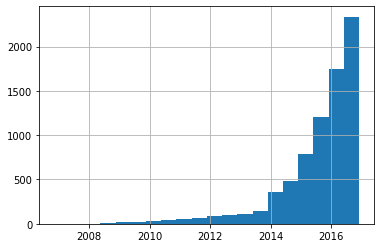

In [62]:
# histogram of review dates to see when most reviews were left
# just a little EDA
df['date'].hist(bins=20);

## 1.1 Clean Review Text (with Regular Expressions `regex`)
dataquest has a good [regex reference](https://www.dataquest.io/wp-content/uploads/2019/03/python-regular-expressions-cheat-sheet.pdf
)

It looks like the reviews have the following characteristics

- Date at the beginning 
- Lots of punctuation 
- Use special characters like $ (as well as dollar amounts)
- Upper and lower case words

In [63]:
import re
# considering using regex to remove dates
# you can create and test regular expressions on this online regex editor: https://regex101.com/
    
def clean_data(text):
    """
    Accepts a single text document and performs several regex substitutions in order to clean the document. 
    
    Parameters
    ----------
    text: string or object 
    
    Returns
    -------
    text: string or object
    """
    
    # order of operations - apply the expression from top to bottom
    date_regex = r"\d+/\d+/\d+"
    punct_regex = r"[^0-9a-zA-Z\s]" # any non-alphanumeric chars
    special_chars_regex = r"[\$\%\&\@+]" 
    numerical_regex = r"\d+"  # match one or more digits
    
    # Replace any strings matching the above regex patterns with blank strings
    # (effectively removing them from the text)
    text = re.sub(date_regex, "", text)
    text = re.sub(punct_regex, "", text)
    text = re.sub(special_chars_regex, "", text)
    text = re.sub(numerical_regex, "", text)

    # match one or more whitespace chars
    whitespace_regex = r"\s"
    # replace one or more whitespace characters with a single white space char
    #    not a blank string!
    text = re.sub(whitespace_regex, " ", text)


    # apply case normalization
    text = text.lower()
    return text

In [64]:
df.full_review_text = df.full_review_text.apply(lambda text: clean_data(text))
#this is the efficient way to iterate through all the data

In [65]:
N = 5
print_out_N_reviews(N, df, col_name='full_review_text')

   checkin love love loved the atmosphere every corner of the coffee shop had its own style and there were swings i ordered the matcha latte and it was muy fantastico ordering and getting my drink were pretty streamlined i ordered on an ipad which included all beverage selections that ranged from coffee to wine desired level of sweetness and a checkout system i got my latte within minutes  i was hoping for a typical heart or feather on my latte but found myself listing out all the possibilities of what the art may be any ideas 
  
  listed in date night austin ambiance in austin beautiful love the ambiance instagramworthy  definitely  so be prepared this is gonna cost you a pretty penny  waffle dessert was just decentnothing to rave about  but will probably be back just to be somewhere unique and nice 
  
   checkin listed in brunch spots i loved the eclectic and homey plush decor and who doesnt want to swing and drink their coffee  i would categorize this as a pricier coffee place but

In [66]:
df['cleaned_review'] = df['full_review_text'].apply(clean_data)

df['cleaned_review'][0]

'   checkin love love loved the atmosphere every corner of the coffee shop had its own style and there were swings i ordered the matcha latte and it was muy fantastico ordering and getting my drink were pretty streamlined i ordered on an ipad which included all beverage selections that ranged from coffee to wine desired level of sweetness and a checkout system i got my latte within minutes  i was hoping for a typical heart or feather on my latte but found myself listing out all the possibilities of what the art may be any ideas '

## 1.2. Tokenize the cleaned up reviews

In [67]:
# with a for loop
tokens = []
for review in df['cleaned_review']:
  tokens.append(review.split(' '))

df['tokens'] = tokens

df.head()

,coffee_shop_name,full_review_text,star_rating,date,cleaned_review,tokens
0,The Factory - Cafe With a Soul,checkin love love loved the atmosphere ever...,5.0 star rating,2016-11-25,checkin love love loved the atmosphere ever...,"[, , , checkin, love, love, loved, the, atmosp..."
1,The Factory - Cafe With a Soul,listed in date night austin ambiance in aust...,4.0 star rating,2016-12-02,listed in date night austin ambiance in aust...,"[, , listed, in, date, night, austin, ambiance..."
2,The Factory - Cafe With a Soul,checkin listed in brunch spots i loved the ...,4.0 star rating,2016-11-30,checkin listed in brunch spots i loved the ...,"[, , , checkin, listed, in, brunch, spots, i, ..."
3,The Factory - Cafe With a Soul,very cool decor good drinks nice seating ho...,2.0 star rating,2016-11-25,very cool decor good drinks nice seating ho...,"[, , very, cool, decor, good, drinks, nice, se..."
4,The Factory - Cafe With a Soul,checkin they are located within the northcr...,4.0 star rating,2016-12-03,checkin they are located within the northcr...,"[, , , checkin, they, are, located, within, th..."


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7616 entries, 0 to 7615
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   coffee_shop_name  7616 non-null   object        
 1   full_review_text  7616 non-null   object        
 2   star_rating       7616 non-null   object        
 3   date              7616 non-null   datetime64[ns]
 4   cleaned_review    7616 non-null   object        
 5   tokens            7616 non-null   object        
dtypes: datetime64[ns](1), object(5)
memory usage: 357.1+ KB


In [69]:
# with a list comprehension
df['tokens'] = YOUR CODE HERE
df.head()

SyntaxError: ignored

### 1.3 Visualize the most common tokens
Below is the `count()` function that we used in the lecture.

In [70]:
from collections import Counter

def count(token_lists):
    """
    Calculates some basic statistics about tokens in our corpus (i.e. corpus means collections text data)
    """
    # stores the count of each token
    word_counts = Counter()
    
    # stores the number of docs that each token appears in 
    appears_in_docs = Counter()

    total_docs = len(token_lists)

    for token_list in token_lists:
        # stores count of every appearance of a token 
        word_counts.update(token_list)
        
        # use set() in order to not count duplicates, thereby count the num of docs that each token appears in
        appears_in_docs.update(set(token_list))

    # build word count dataframe
    word_count_dict = zip(word_counts.keys(), word_counts.values())
    wc = pd.DataFrame(word_count_dict, columns = ['word', 'count'])

    # rank the the word counts
    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()

    # calculate the percent total of each token
    wc['fraction_of_total'] = wc['count'].apply(lambda token_count: token_count / total)

    # calculate the cumulative percent total of word counts 
    wc = wc.sort_values(by='rank')
    wc['cumulative_fraction_of_total'] = wc['fraction_of_total'].cumsum()

    # create dataframe for document stats
    t2 = zip(appears_in_docs.keys(), appears_in_docs.values())
    ac = pd.DataFrame(t2, columns=['word', 'appears_in_docs'])
    
    # merge word count stats with doc stats
    wc = ac.merge(wc, on='word')

    wc['appears_in_fraction_of_docs'] = wc['appears_in_docs'].apply(lambda x: x / total_docs)

    return wc.sort_values(by='rank')

In [78]:
df_wc = count(df['tokens'])

#### Summary of the descriptive token statistics 

`word` The specific token that is being analyzed

`appears_in_docs` Number of documents that the word/token appears in

`count` The total number of appearances of that token within the corpus 

`rank` Ranking of tokens by count 

`fraction_of_total` Fraction of the total tokens that this token makes up

`cumulative_fraction_of_total` Sum of fractional total of ranked tokens, down to and including this token. 

`appears_in_fraction_of_docs` Fraction of documents that token appears in 

In [79]:
df_wc.head(10)

,word,appears_in_docs,count,rank,fraction_of_total,cumulative_fraction_of_total,appears_in_fraction_of_docs
0,,7616,52191,1.0,0.063748,0.063748,1.000000
18,the,6847,34809,2.0,0.042517,0.106264,0.899028
62,and,6864,26651,3.0,0.032552,0.138816,0.901261
55,a,6246,22756,4.0,0.027795,0.166611,0.820116
34,i,5532,20249,5.0,0.024733,0.191344,0.726366
68,to,5653,17164,6.0,0.020965,0.212309,0.742253
21,of,5100,12600,7.0,0.015390,0.227699,0.669643
100,is,4999,11999,8.0,0.014656,0.242354,0.656381
9,coffee,4877,10354,9.0,0.012647,0.255001,0.640362
65,was,3765,9707,10.0,0.011856,0.266858,0.494354


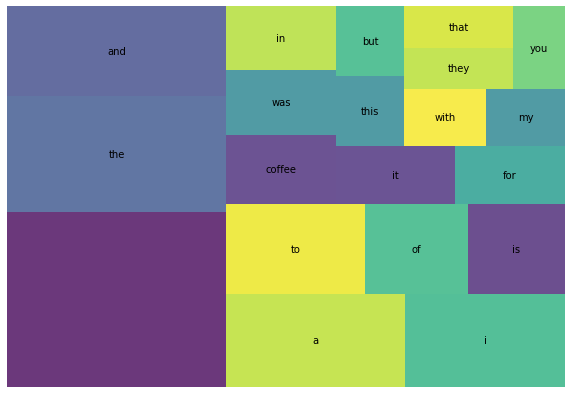

In [80]:
# visualize the 20 most common tokens with squarify
# Lots of stopwords!
import squarify
import matplotlib.pyplot as plt
#YOUR CODE HERE
wc_top20 = df_wc[df_wc['rank'] <= 20]

plt.figure(figsize=(10,7))
squarify.plot(sizes=wc_top20['fraction_of_total'], label=wc_top20['word'], alpha=.8 )

plt.axis('off')
plt.show()

## 1.4 Clean, tokenize, remove stopwords, and lemmatize the reviews (with Spacy)

We can do all of the above with Spacy, but Spacy has the added benefit of making it easy to lemmatize tokens and remove stop words as well! Let's write a tokenize function with Spacy. 

In [81]:
import spacy
# import the large version of the pre-trained model
# depending on your computational resources/limitations, you might need to download and load in a smaller version of the model 
# see the spaCy docs: https://spacy.io/models/en
nlp = spacy.load("en_core_web_sm")

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


## Remove stop word, punctuation and whitespace from each token

In [82]:
# this will take longer to run than a regex method because Spacy is doing a fair amount
# of extra stuff under the hood in creating the token attributes and everything.

def spacy_tokenizer(text):
    """
    Use the pre-trained model from Space to tokenize our text into lemmas 
    
    Notes
    -----
    Rememeber that the pre-trained spaCy model has a lot of built in flags for what kind of token each token is
    so we can use that functionality to create filters for stop words, white spaces, punctuation, and so on!
    
    See list of flags here: https://spacy.io/api/token#attributes
    
    Parameter
    ---------
    text: string
        Full text article/document that needs to be tokenized 
    """
    # tokens = []
    # for token in nlp(text):
    #     # if statement will filter out stopwords, punctuation, and whitespace
    #     # COMPLETE THE CODE HERE
    #     if ((token.is_stop != True) and (token.isspace != True)):
    #         # Now lemmatize!
    #         tokens.append(token.?)
    
    # return tokens
    doc = nlp(text)
    return [token.lemma_ for token in doc if (token.is_stop != True) and (token.is_space != True)]

In [83]:
df['tokens'] = df.full_review_text.apply(lambda text: spacy_tokenizer(text))

In [84]:
df.tokens.iloc[:5]

0    [checkin, love, love, love, atmosphere, corner...
1    [list, date, night, austin, ambiance, austin, ...
2    [checkin, list, brunch, spot, love, eclectic, ...
3    [cool, decor, good, drink, nice, seating, over...
4    [checkin, locate, northcross, mall, shopping, ...
Name: tokens, dtype: object

In [85]:
df.head()

,coffee_shop_name,full_review_text,star_rating,date,cleaned_review,tokens
0,The Factory - Cafe With a Soul,checkin love love loved the atmosphere ever...,5.0 star rating,2016-11-25,checkin love love loved the atmosphere ever...,"[checkin, love, love, love, atmosphere, corner..."
1,The Factory - Cafe With a Soul,listed in date night austin ambiance in aust...,4.0 star rating,2016-12-02,listed in date night austin ambiance in aust...,"[list, date, night, austin, ambiance, austin, ..."
2,The Factory - Cafe With a Soul,checkin listed in brunch spots i loved the ...,4.0 star rating,2016-11-30,checkin listed in brunch spots i loved the ...,"[checkin, list, brunch, spot, love, eclectic, ..."
3,The Factory - Cafe With a Soul,very cool decor good drinks nice seating ho...,2.0 star rating,2016-11-25,very cool decor good drinks nice seating ho...,"[cool, decor, good, drink, nice, seating, over..."
4,The Factory - Cafe With a Soul,checkin they are located within the northcr...,4.0 star rating,2016-12-03,checkin they are located within the northcr...,"[checkin, locate, northcross, mall, shopping, ..."


In [ ]:
#WE NOW HAVE OUR TEXT DATA IN ANANLYZABLE FORMAT!!!!

In [ ]:
# # This code cell takes ~ 3 minutes on Google Colab
# %%time 
# # YOUR CODE HERE
# df['spacy_tokens'] = df['?'].apply(?)

##1.5 Visualize the Spacy Tokens

In [86]:
wc = count(df['tokens'])

wc_top20 = wc[wc['rank'] <= 20]

squarify...
plt.axis('off')
plt.show()

SyntaxError: ignored

# 2. Compare High and Low Coffeeshop reviews!

- We'll say that a "good" rating is 4 or 5 stars
- a "bad" rating is 3 stars or less

## 2.1 Create a numeric version of the star rating

In [ ]:
#new column will be called sentiment 1 for good and 0 for bad

In [87]:
df.head()

,coffee_shop_name,full_review_text,star_rating,date,cleaned_review,tokens
0,The Factory - Cafe With a Soul,checkin love love loved the atmosphere ever...,5.0 star rating,2016-11-25,checkin love love loved the atmosphere ever...,"[checkin, love, love, love, atmosphere, corner..."
1,The Factory - Cafe With a Soul,listed in date night austin ambiance in aust...,4.0 star rating,2016-12-02,listed in date night austin ambiance in aust...,"[list, date, night, austin, ambiance, austin, ..."
2,The Factory - Cafe With a Soul,checkin listed in brunch spots i loved the ...,4.0 star rating,2016-11-30,checkin listed in brunch spots i loved the ...,"[checkin, list, brunch, spot, love, eclectic, ..."
3,The Factory - Cafe With a Soul,very cool decor good drinks nice seating ho...,2.0 star rating,2016-11-25,very cool decor good drinks nice seating ho...,"[cool, decor, good, drink, nice, seating, over..."
4,The Factory - Cafe With a Soul,checkin they are located within the northcr...,4.0 star rating,2016-12-03,checkin they are located within the northcr...,"[checkin, locate, northcross, mall, shopping, ..."


In [88]:
df['star_rating'].unique()

array([' 5.0 star rating ', ' 4.0 star rating ', ' 2.0 star rating ',
       ' 3.0 star rating ', ' 1.0 star rating '], dtype=object)

In [89]:
def get_sentiment(rating):

  num_rating = float(rating[:2])

  if num_rating >= 4:
    return 1
  else:
    return 0

In [90]:
df['sentiment'] = df.star_rating.apply(lambda rating: get_sentiment(rating))

In [91]:
df.head()

,coffee_shop_name,full_review_text,star_rating,date,cleaned_review,tokens,sentiment
0,The Factory - Cafe With a Soul,checkin love love loved the atmosphere ever...,5.0 star rating,2016-11-25,checkin love love loved the atmosphere ever...,"[checkin, love, love, love, atmosphere, corner...",1
1,The Factory - Cafe With a Soul,listed in date night austin ambiance in aust...,4.0 star rating,2016-12-02,listed in date night austin ambiance in aust...,"[list, date, night, austin, ambiance, austin, ...",1
2,The Factory - Cafe With a Soul,checkin listed in brunch spots i loved the ...,4.0 star rating,2016-11-30,checkin listed in brunch spots i loved the ...,"[checkin, list, brunch, spot, love, eclectic, ...",1
3,The Factory - Cafe With a Soul,very cool decor good drinks nice seating ho...,2.0 star rating,2016-11-25,very cool decor good drinks nice seating ho...,"[cool, decor, good, drink, nice, seating, over...",0
4,The Factory - Cafe With a Soul,checkin they are located within the northcr...,4.0 star rating,2016-12-03,checkin they are located within the northcr...,"[checkin, locate, northcross, mall, shopping, ...",1


##2.2 Split into two dataframes based on star rating
good: ratings 4 and 5 <br>
bad: ratings <4

In [92]:
# Complete code here
good_mask = df.sentiment == 1
bad_mask = df.sentiment == 0
good_wc = df[good_mask]
bad_wc = df[bad_mask]

In [93]:
# make sure that all reviews are accounted for in one of the two groups
assert df.shape[0] == good_wc.shape[0] + bad_wc.shape[0]

#### Summary of the descriptive token statistics 

`word` The specific token that is being analyzed

`appears_in_docs` Number of documents that the word/token appears in

`count` The total number of appearances of that token within the corpus 

`rank` Ranking of tokens by count 

`fraction_of_total` Fraction of the total tokens that this token makes up

`cumulative_fraction_of_total` Sum of fractional total of ranked tokens, down to and including this token. 

`appears_in_fraction_of_docs` Fraction of documents that token appears in 

In [94]:
good_wc.head(10)


,coffee_shop_name,full_review_text,star_rating,date,cleaned_review,tokens,sentiment
0,The Factory - Cafe With a Soul,checkin love love loved the atmosphere ever...,5.0 star rating,2016-11-25,checkin love love loved the atmosphere ever...,"[checkin, love, love, love, atmosphere, corner...",1
1,The Factory - Cafe With a Soul,listed in date night austin ambiance in aust...,4.0 star rating,2016-12-02,listed in date night austin ambiance in aust...,"[list, date, night, austin, ambiance, austin, ...",1
2,The Factory - Cafe With a Soul,checkin listed in brunch spots i loved the ...,4.0 star rating,2016-11-30,checkin listed in brunch spots i loved the ...,"[checkin, list, brunch, spot, love, eclectic, ...",1
4,The Factory - Cafe With a Soul,checkin they are located within the northcr...,4.0 star rating,2016-12-03,checkin they are located within the northcr...,"[checkin, locate, northcross, mall, shopping, ...",1
5,The Factory - Cafe With a Soul,checkin very cute cafe i think from the mom...,4.0 star rating,2016-11-20,checkin very cute cafe i think from the mom...,"[checkin, cute, cafe, think, moment, step, not...",1
6,The Factory - Cafe With a Soul,checkins listed in nuptial coffee bliss and...,4.0 star rating,2016-10-27,checkins listed in nuptial coffee bliss and...,"[checkin, list, nuptial, coffee, bliss, anders...",1
7,The Factory - Cafe With a Soul,checkins love this place stars for cleanl...,5.0 star rating,2016-11-02,checkins love this place stars for cleanl...,"[checkins, love, place, star, cleanliness, sta...",1
9,The Factory - Cafe With a Soul,checkins this place has been shown on my so...,5.0 star rating,2016-11-10,checkins this place has been shown on my so...,"[checkin, place, show, social, medium, day, fi...",1
10,The Factory - Cafe With a Soul,checkin listed in americano this is not you...,4.0 star rating,2016-10-22,checkin listed in americano this is not you...,"[checkin, list, americano, average, cute, stud...",1
13,The Factory - Cafe With a Soul,this is such a cute little cafe ive driven b...,5.0 star rating,2016-12-05,this is such a cute little cafe ive driven b...,"[cute, little, cafe, ve, drive, place, time, n...",1


In [95]:

bad_wc.head(10)

,coffee_shop_name,full_review_text,star_rating,date,cleaned_review,tokens,sentiment
3,The Factory - Cafe With a Soul,very cool decor good drinks nice seating ho...,2.0 star rating,2016-11-25,very cool decor good drinks nice seating ho...,"[cool, decor, good, drink, nice, seating, over...",0
8,The Factory - Cafe With a Soul,checkin ok lets try this approach pros mus...,3.0 star rating,2016-10-25,checkin ok lets try this approach pros mus...,"[checkin, ok, let, try, approach, pro, music, ...",0
11,The Factory - Cafe With a Soul,the store has a decoration but honestly the ...,3.0 star rating,2016-11-20,the store has a decoration but honestly the ...,"[store, decoration, honestly, coffee, good, co...",0
12,The Factory - Cafe With a Soul,checkin listed in the third time is a cha...,3.0 star rating,2016-11-17,checkin listed in the third time is a cha...,"[checkin, list, time, charm, factory, decor, i...",0
25,The Factory - Cafe With a Soul,okay so after visiting my friends in la and ...,1.0 star rating,2016-12-02,okay so after visiting my friends in la and ...,"[okay, visit, friend, la, try, mint, mojito, i...",0
33,The Factory - Cafe With a Soul,checkin my best friend and i came to the fa...,3.0 star rating,2016-11-23,checkin my best friend and i came to the fa...,"[checkin, good, friend, come, factory, see, co...",0
39,The Factory - Cafe With a Soul,a cafe that doesnt have wifi but makes you o...,1.0 star rating,2016-12-02,a cafe that doesnt have wifi but makes you o...,"[cafe, not, wifi, make, order, ipad, seriously...",0
40,The Factory - Cafe With a Soul,honestly this place is having an identity cr...,2.0 star rating,2016-11-14,honestly this place is having an identity cr...,"[honestly, place, have, identity, crisis, grea...",0
48,The Factory - Cafe With a Soul,checkin i love the deco a lot its a really ...,3.0 star rating,2016-11-26,checkin i love the deco a lot its a really ...,"[checkin, love, deco, lot, good, place, chill,...",0
58,The Factory - Cafe With a Soul,this is a tough one for me i took my childr...,2.0 star rating,2016-11-20,this is a tough one for me i took my childr...,"[tough, take, child, treat, afternoon, impress...",0


##2.3 Visualize top 20 `good` and top 20 `bad` tokens using a word cloud

In [ ]:
# COMPLETE CODE HERE
good_top20 = good_wc[good_wc['rank'] <= 20]
plt.figure(figsize=(10,7))
squarify.plot(?? )
plt.title("Positive Reviews")
plt.axis('off')
plt.show()

bad_top20 = bad_wc[bad_wc['rank'] <= 20]
plt.figure(figsize=(10,7))
squarify.plot(??)
plt.title("Negative Reviews")
plt.axis('off')
plt.show()

## 3. Find out which words are likely to occur in "good" and "bad" reviews
Ok - let's do a more thorough analysis! <br>
Looking at `df_pos_wc` and `df_neg_wc` we notice that certain words are ranked higher in one data set and lower in the other. 

In [96]:
# these are words that are ranked high in one data set but not the other
# you might try working with two keyword lists -- one for the good reviews and one for the bad reviews 
key_words = []

In [97]:
good_wc.head()

,coffee_shop_name,full_review_text,star_rating,date,cleaned_review,tokens,sentiment
0,The Factory - Cafe With a Soul,checkin love love loved the atmosphere ever...,5.0 star rating,2016-11-25,checkin love love loved the atmosphere ever...,"[checkin, love, love, love, atmosphere, corner...",1
1,The Factory - Cafe With a Soul,listed in date night austin ambiance in aust...,4.0 star rating,2016-12-02,listed in date night austin ambiance in aust...,"[list, date, night, austin, ambiance, austin, ...",1
2,The Factory - Cafe With a Soul,checkin listed in brunch spots i loved the ...,4.0 star rating,2016-11-30,checkin listed in brunch spots i loved the ...,"[checkin, list, brunch, spot, love, eclectic, ...",1
4,The Factory - Cafe With a Soul,checkin they are located within the northcr...,4.0 star rating,2016-12-03,checkin they are located within the northcr...,"[checkin, locate, northcross, mall, shopping, ...",1
5,The Factory - Cafe With a Soul,checkin very cute cafe i think from the mom...,4.0 star rating,2016-11-20,checkin very cute cafe i think from the mom...,"[checkin, cute, cafe, think, moment, step, not...",1


In [99]:
df_pos_keywords_mask = good_wc.tokens.isin(key_words)
df_pos_keywords = good_wc[df_pos_keywords_mask]
df_pos_keywords.head()

,coffee_shop_name,full_review_text,star_rating,date,cleaned_review,tokens,sentiment


In [100]:
df_neg_keywords_mask = bad_wc.tokens.isin(key_words)
df_neg_keywords = bad_wc[df_neg_keywords_mask]
df_neg_keywords.head()

,coffee_shop_name,full_review_text,star_rating,date,cleaned_review,tokens,sentiment


AttributeError: ignored

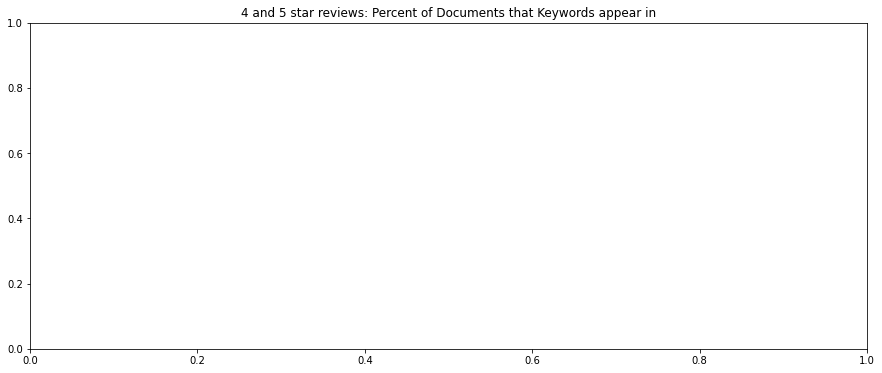

In [103]:
import seaborn as sns

plt.figure(figsize=(15,6))
plt.title("4 and 5 star reviews: Percent of Documents that Keywords appear in")
sns.barplot(x=df_pos_keywords.tokens, y=df_pos_keywords.appears_in_fraction_of_docs, palette="rocket", order=key_words);
plt.ylim(0,.42)
plt.show();

plt.figure(figsize=(15,6))
plt.title("1, 2, and 3 star reviews: Percent of Documents that Keywords appear in")
sns.barplot(x=df_neg_keywords.tokens, y=df_neg_keywords.appears_in_fraction_of_docs, palette="rocket", order=key_words);
plt.ylim(0,.42)
plt.show();